In [59]:
import requests
import pandas as pd
import math
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score
from tqdm import tqdm

First let's grab the data.  It's cool how pandas allows you to read data from a url.  

In [11]:
url = "https://risweb.st-andrews.ac.uk/portal/files/251452157/dls_100.xlsx"
df = pd.read_excel(url)
df.dropna(inplace=True)

In [39]:
data = df['LogS exp (mol/L)']
output = [data]
for fold in (3,5,10):
    error = np.random.normal(0,np.log10(fold),len(data))
    output.append(error+data)
output_df = pd.DataFrame(output)
output_df = output_df.transpose()
output_df.columns = ["Experimental LogS","3-Fold","5-Fold","10-fold"]
output_df.head()

,Experimental LogS,3-Fold,5-Fold,10-fold
0,-1.40,-1.692965,-1.615483,-0.595105
1,-1.73,-2.310987,-2.040233,-0.652070
2,-2.26,-2.216192,-1.741605,-1.541305
3,-2.95,-2.324166,-3.663654,-1.442061
4,-2.44,-3.296924,-2.420393,-3.191587


In [42]:
df_melt = output_df.melt(id_vars="Experimental LogS")
df_melt.head()

,Experimental LogS,variable,value
0,-1.40,3-Fold,-1.692965
1,-1.73,3-Fold,-2.310987
2,-2.26,3-Fold,-2.216192
3,-2.95,3-Fold,-2.324166
4,-2.44,3-Fold,-3.296924


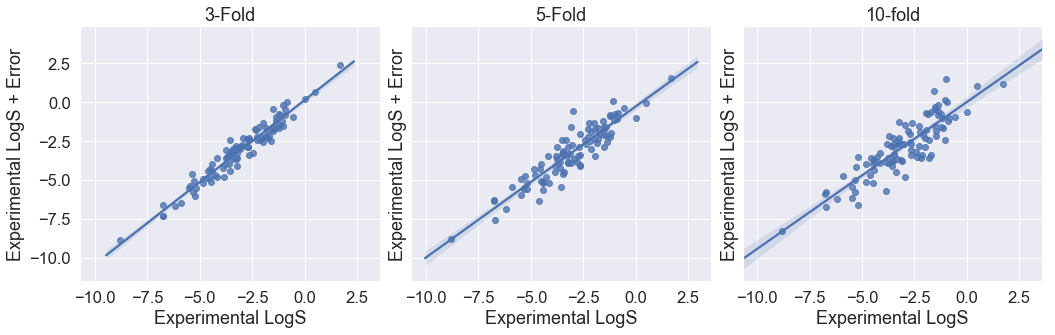

In [54]:
sns.set(font_scale=1.5)
g = sns.lmplot(x="Experimental LogS",y="value",col="variable",data=df_melt)
title_list = ["3-Fold","5-Fold","10-fold"]
for i in range(0,3):
    g.axes[0,i].set_ylabel('Experimental LogS + Error')
    g.axes[0,i].set_title(title_list[i])

In [64]:
cor_list = []
for fold in tqdm([3,5,10]):
    for i in range(0,1000):
        error = np.random.normal(0,np.log10(fold),len(data))
        cor_list.append([r2_score(data,data+error),f"{fold}-Fold"])
error_df = pd.DataFrame(cor_list,columns=["r2","fold_error"])
error_df.head()

100%|██████████| 3/3 [00:01<00:00,  1.52it/s]


,r2,fold_error
0,0.921649,3-Fold
1,0.913933,3-Fold
2,0.915204,3-Fold
3,0.915044,3-Fold
4,0.922622,3-Fold


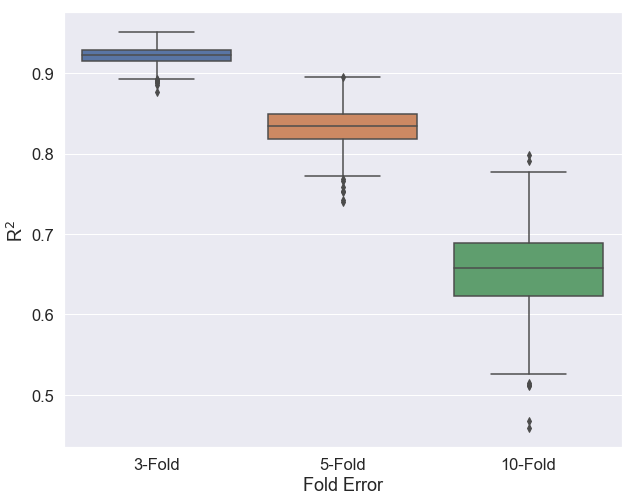

In [74]:
sns.set(rc={'figure.figsize': (10, 8)},font_scale=1.5)
ax = sns.boxplot(x="fold_error",y="r2",data=error_df)
_ = ax.set(xlabel="Fold Error",ylabel="R$^2$")